<a href="https://colab.research.google.com/github/bs3537/DS-Unit-2-Kaggle-Challenge/blob/master/Version2_PyTorch_Copy_of_Bhav_NBA_Copy_of_DS_Sprint_Challenge_6_Nov_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science, Unit 2_
 
# Sprint Challenge: Predict Steph Curry's shots 🏀

For your Sprint Challenge, you'll use a dataset with all Steph Curry's NBA field goal attempts. (Regular season and playoff games, from October 28, 2009, through June 5, 2019.) 

You'll predict whether each shot was made, using information about the shot and the game. This is hard to predict! Try to get above 60% accuracy. The dataset was collected with the [nba_api](https://github.com/swar/nba_api) Python library.

In [0]:
%%capture
import sys

if 'google.colab' in sys.modules:
    # Install packages in Colab
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*

In [0]:
# Read data
import pandas as pd
url = 'https://drive.google.com/uc?export=download&id=1fL7KPyxgGYfQDsuJoBWHIWwCAf-HTFpX'
df = pd.read_csv(url)

# Check data shape
assert df.shape == (13958, 20)

## 1. Begin with baselines for classification. 

>Your target to predict is `shot_made_flag`. What would your baseline accuracy be, if you guessed the majority class for every prediction?

In [0]:
df.shape

(13958, 20)

In [0]:
df.head()

,game_id,game_event_id,player_name,period,minutes_remaining,seconds_remaining,action_type,shot_type,shot_zone_basic,shot_zone_area,shot_zone_range,shot_distance,loc_x,loc_y,shot_made_flag,game_date,htm,vtm,season_type,scoremargin_before_shot
0,20900015,4,Stephen Curry,1,11,25,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,26,99,249,0,2009-10-28,GSW,HOU,Regular Season,2.0
1,20900015,17,Stephen Curry,1,9,31,Step Back Jump shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,18,-122,145,1,2009-10-28,GSW,HOU,Regular Season,0.0
2,20900015,53,Stephen Curry,1,6,2,Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),8-16 ft.,14,-60,129,0,2009-10-28,GSW,HOU,Regular Season,-4.0
3,20900015,141,Stephen Curry,2,9,49,Jump Shot,2PT Field Goal,Mid-Range,Left Side(L),16-24 ft.,19,-172,82,0,2009-10-28,GSW,HOU,Regular Season,-4.0
4,20900015,249,Stephen Curry,2,2,19,Jump Shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,16,-68,148,0,2009-10-28,GSW,HOU,Regular Season,0.0


In [0]:
df.isnull().sum()

game_id                    0
game_event_id              0
player_name                0
period                     0
minutes_remaining          0
seconds_remaining          0
action_type                0
shot_type                  0
shot_zone_basic            0
shot_zone_area             0
shot_zone_range            0
shot_distance              0
loc_x                      0
loc_y                      0
shot_made_flag             0
game_date                  0
htm                        0
vtm                        0
season_type                0
scoremargin_before_shot    0
dtype: int64

In [0]:
df['shot_made_flag'].unique()

array([0, 1])

In [0]:
df['shot_made_flag'].value_counts(normalize=True)

0    0.527081
1    0.472919
Name: shot_made_flag, dtype: float64

In [0]:
#Thus, at the baseline, the accuracy for majority class i.e. shot not made is 52% and that for shot made is 47.3%

In [0]:
#use pd_to datetime to convert game date to numeric form
df['game_date'] = pd.to_datetime(df['game_date'])

In [0]:
#extract year from game_date column 
df['game_year'] = df['game_date'].dt.year

In [0]:
#also extract month and date columns
df['game_month'] = df['game_date'].dt.month
df['game_day'] = df['game_date'].dt.day

In [0]:
df.head()

,game_id,game_event_id,player_name,period,minutes_remaining,seconds_remaining,action_type,shot_type,shot_zone_basic,shot_zone_area,shot_zone_range,shot_distance,loc_x,loc_y,shot_made_flag,game_date,htm,vtm,season_type,scoremargin_before_shot,game_year,game_month,game_day
0,20900015,4,Stephen Curry,1,11,25,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,26,99,249,0,2009-10-28,GSW,HOU,Regular Season,2.0,2009,10,28
1,20900015,17,Stephen Curry,1,9,31,Step Back Jump shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,18,-122,145,1,2009-10-28,GSW,HOU,Regular Season,0.0,2009,10,28
2,20900015,53,Stephen Curry,1,6,2,Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),8-16 ft.,14,-60,129,0,2009-10-28,GSW,HOU,Regular Season,-4.0,2009,10,28
3,20900015,141,Stephen Curry,2,9,49,Jump Shot,2PT Field Goal,Mid-Range,Left Side(L),16-24 ft.,19,-172,82,0,2009-10-28,GSW,HOU,Regular Season,-4.0,2009,10,28
4,20900015,249,Stephen Curry,2,2,19,Jump Shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,16,-68,148,0,2009-10-28,GSW,HOU,Regular Season,0.0,2009,10,28


In [0]:
df['game_date'].dtype

dtype('<M8[ns]')

## 3. Engineer new feature.

>Engineer at least **1** new feature, from this list, or your own idea.
>
>- **Homecourt Advantage**: Is the home team (`htm`) the Golden State Warriors (`GSW`) ?
>- **Opponent**: Who is the other team playing the Golden State Warriors?
>- **Seconds remaining in the period**: Combine minutes remaining with seconds remaining, to get the total number of seconds remaining in the period.
>- **Seconds remaining in the game**: Combine period, and seconds remaining in the period, to get the total number of seconds remaining in the game. A basketball game has 4 periods, each 12 minutes long.
>- **Made previous shot**: Was Steph Curry's previous shot successful?

    

In [0]:
df['htm'].unique()

array(['GSW', 'PHX', 'SAC', 'IND', 'MIL', 'CLE', 'BOS', 'DAL', 'SAS',
       'DEN', 'OKC', 'NJN', 'CHI', 'DET', 'PHI', 'MEM', 'NOH', 'LAL',
       'POR', 'MIN', 'HOU', 'MIA', 'ORL', 'ATL', 'CHA', 'LAC', 'UTA',
       'TOR', 'WAS', 'NYK', 'BKN', 'NOP'], dtype=object)

In [0]:
#create a new column where if home teream is Golden State warriers, code as 1, else 0
cleanup_htm = {"htm":     {"GSW": 1, "PHX": 0, "SAC": 0, "IND":0, "MIL":0,
                           "CLE":0, "BOS":0, "DAL":0, "SAS":0, "DEN":0, 
                           "OKC":0, "NJN":0, "CHI":0, "DET":0, "PHI":0, 
                           "MEM":0, "NOH":0, "LAL":0, "POR":0, "MIN":0,
                           "HOU":0, "MIA":0, "ORL":0, "ATL":0, "CHA":0, 
                           "LAC":0, "UTA":0, "TOR":0, "WAS":0, "NYK":0,
                           "BKN":0, "NOP":0}}

In [0]:
df.replace(cleanup_htm, inplace=True)


In [0]:
df.head()

,game_id,game_event_id,player_name,period,minutes_remaining,seconds_remaining,action_type,shot_type,shot_zone_basic,shot_zone_area,shot_zone_range,shot_distance,loc_x,loc_y,shot_made_flag,game_date,htm,vtm,season_type,scoremargin_before_shot,game_year,game_month,game_day
0,20900015,4,Stephen Curry,1,11,25,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,26,99,249,0,2009-10-28,1,HOU,Regular Season,2.0,2009,10,28
1,20900015,17,Stephen Curry,1,9,31,Step Back Jump shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,18,-122,145,1,2009-10-28,1,HOU,Regular Season,0.0,2009,10,28
2,20900015,53,Stephen Curry,1,6,2,Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),8-16 ft.,14,-60,129,0,2009-10-28,1,HOU,Regular Season,-4.0,2009,10,28
3,20900015,141,Stephen Curry,2,9,49,Jump Shot,2PT Field Goal,Mid-Range,Left Side(L),16-24 ft.,19,-172,82,0,2009-10-28,1,HOU,Regular Season,-4.0,2009,10,28
4,20900015,249,Stephen Curry,2,2,19,Jump Shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,16,-68,148,0,2009-10-28,1,HOU,Regular Season,0.0,2009,10,28


In [0]:
df['htm'].unique()

array([1, 0])

In [0]:
#Thus, we have engineered one new feature, the newly encoded home team is GWS as binary values column

In [0]:
# we have also engineered 3 more new columns, day, month and year of the game. Thus, total 4 new features were engineered.

In [0]:
import torch
import torch.nn as nn

In [0]:
#encode zeros as null values
import numpy as np
def wrangle(X):
  X = X.copy()
  #replace zeros with null values
  cols_with_zeros = ['loc_x', 'loc_y', 'minutes_remaining', 
                  'scoremargin_before_shot', 'seconds_remaining',
                   'shot_distance']
  for col in cols_with_zeros:
      X[col] = X[col].replace(0, np.nan)
  #drop player name and game_date columns
  dropped = ['player_name', 'game_date']
  X = X.drop(columns=dropped)
 # return the wrangled dataframe
  return X

In [0]:
#Apply wrangle function 
df = wrangle(df)


In [0]:
#define target and features
outputs = "shot_made_flag"
df_columns = df.drop(columns=[outputs])


In [0]:
numeric_features = ["period", "minutes_remaining", "seconds_remaining", "shot_distance", "loc_x", "loc_y", "scoremargin_before_shot", "game_year", "game_month", "game_day"]
categorical_features = ["action_type", "shot_zone_basic", "shot_zone_area", "shot_zone_range", "shot_zone_range", "vtm"]

In [0]:
numeric_features

['period',
 'minutes_remaining',
 'seconds_remaining',
 'shot_distance',
 'loc_x',
 'loc_y',
 'scoremargin_before_shot',
 'game_year',
 'game_month',
 'game_day']

In [0]:
for category in categorical_features:
    df[category] = df[category].astype('category')

In [0]:
df['action_type'].head().cat.codes

0    24
1    44
2    24
3    24
4    24
dtype: int8

In [0]:
action = df['action_type'].cat.codes.values

zone = df['shot_zone_basic'].cat.codes.values
area = df['shot_zone_area'].cat.codes.values
shot_range = df['shot_zone_range'].cat.codes.values
basic = df['shot_zone_range'].cat.codes.values
vtm = df['vtm'].cat.codes.values

categorical_data = np.stack([action, zone, area, shot_range, basic, vtm], 1)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
categorical_data = imputer.fit_transform(categorical_data) 

In [0]:
categorical_data = torch.tensor(categorical_data, dtype=torch.int64)
categorical_data[:10]

tensor([[24,  0,  4,  1,  1, 10],
        [44,  4,  2,  0,  0, 10],
        [24,  2,  1,  2,  2, 10],
        [24,  4,  3,  0,  0, 10],
        [24,  4,  2,  0,  0, 10],
        [24,  2,  1,  4,  4, 10],
        [28,  4,  2,  0,  0, 10],
        [28,  4,  4,  0,  0, 10],
        [28,  4,  4,  0,  0, 10],
        [28,  4,  2,  0,  0, 10]])

In [0]:
numerical_data = np.stack([df[col].values for col in numeric_features], 1)
numerical_data = imputer.fit_transform(numerical_data) 

In [0]:

numerical_data = torch.tensor(numerical_data, dtype=torch.float)
numerical_data[:5]

tensor([[ 1.0000e+00,  1.1000e+01,  2.5000e+01,  2.6000e+01,  9.9000e+01,
          2.4900e+02,  2.0000e+00,  2.0090e+03,  1.0000e+01,  2.8000e+01],
        [ 1.0000e+00,  9.0000e+00,  3.1000e+01,  1.8000e+01, -1.2200e+02,
          1.4500e+02,  1.7233e+00,  2.0090e+03,  1.0000e+01,  2.8000e+01],
        [ 1.0000e+00,  6.0000e+00,  2.0000e+00,  1.4000e+01, -6.0000e+01,
          1.2900e+02, -4.0000e+00,  2.0090e+03,  1.0000e+01,  2.8000e+01],
        [ 2.0000e+00,  9.0000e+00,  4.9000e+01,  1.9000e+01, -1.7200e+02,
          8.2000e+01, -4.0000e+00,  2.0090e+03,  1.0000e+01,  2.8000e+01],
        [ 2.0000e+00,  2.0000e+00,  1.9000e+01,  1.6000e+01, -6.8000e+01,
          1.4800e+02,  1.7233e+00,  2.0090e+03,  1.0000e+01,  2.8000e+01]])

In [0]:
outputs = torch.tensor(df[outputs].values).flatten()
outputs[:5]

tensor([0, 1, 0, 0, 0])

In [0]:
print(categorical_data.shape)
print(numerical_data.shape)
print(outputs.shape)

torch.Size([13958, 6])
torch.Size([13958, 10])
torch.Size([13958])


In [0]:
categorical_column_sizes = [len(df[column].cat.categories) for column in categorical_features]
categorical_embedding_sizes = [(col_size, min(50, (col_size+1)//2)) for col_size in categorical_column_sizes]
print(categorical_embedding_sizes)

[(53, 27), (7, 4), (6, 3), (5, 3), (5, 3), (32, 16)]


In [0]:
total_records = 13958
test_records = int(total_records * .2)

categorical_train_data = categorical_data[:total_records-test_records]
categorical_test_data = categorical_data[total_records-test_records:total_records]
numerical_train_data = numerical_data[:total_records-test_records]
numerical_test_data = numerical_data[total_records-test_records:total_records]
train_outputs = outputs[:total_records-test_records]
test_outputs = outputs[total_records-test_records:total_records]

In [0]:
print(len(categorical_train_data))
print(len(numerical_train_data))
print(len(train_outputs))

print(len(categorical_test_data))
print(len(numerical_test_data))
print(len(test_outputs))

11167
11167
11167
2791
2791
2791


In [0]:
class Model(nn.Module):

    def __init__(self, embedding_size, num_numerical_cols, output_size, layers, p=0.4):
        super().__init__()
        self.all_embeddings = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in embedding_size])
        self.embedding_dropout = nn.Dropout(p)
        self.batch_norm_num = nn.BatchNorm1d(num_numerical_cols)

        all_layers = []
        num_categorical_cols = sum((nf for ni, nf in embedding_size))
        input_size = num_categorical_cols + num_numerical_cols

        for i in layers:
            all_layers.append(nn.Linear(input_size, i))
            all_layers.append(nn.ReLU(inplace=True))
            all_layers.append(nn.BatchNorm1d(i))
            all_layers.append(nn.Dropout(p))
            input_size = i

        all_layers.append(nn.Linear(layers[-1], output_size))
        self.layers = nn.Sequential(*all_layers)

    def forward(self, x_categorical, x_numerical):
        embeddings = []
        for i,e in enumerate(self.all_embeddings):
            embeddings.append(e(x_categorical[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.embedding_dropout(x)

        x_numerical = self.batch_norm_num(x_numerical)
        x = torch.cat([x, x_numerical], 1)
        x = self.layers(x)
        return x

In [0]:
model = Model(categorical_embedding_sizes, numerical_data.shape[1], 2, [200,100,50], p=0.4)

In [0]:
model(categorical_train_data, numerical_train_data)

tensor([[ 1.2415, -0.5350],
        [ 0.0405, -0.5412],
        [-0.4778, -0.1508],
        ...,
        [ 0.9481,  0.4011],
        [-1.8057,  0.3343],
        [ 0.0658,  1.2829]], grad_fn=<AddmmBackward>)

In [0]:
print(model)

Model(
  (all_embeddings): ModuleList(
    (0): Embedding(53, 27)
    (1): Embedding(7, 4)
    (2): Embedding(6, 3)
    (3): Embedding(5, 3)
    (4): Embedding(5, 3)
    (5): Embedding(32, 16)
  )
  (embedding_dropout): Dropout(p=0.4, inplace=False)
  (batch_norm_num): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=66, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=50, bias=True)
    (9): ReLU(inplace=True)
    (10): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): 

In [0]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [0]:
epochs = 300
aggregated_losses = []

for i in range(epochs):
    i += 1
    y_pred = model(categorical_train_data, numerical_train_data)
    single_loss = loss_function(y_pred, train_outputs)
    aggregated_losses.append(single_loss)

    if i%25 == 1:
        print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

    optimizer.zero_grad()
    single_loss.backward()
    optimizer.step()

print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')

epoch:   1 loss: 0.83617687
epoch:  26 loss: 0.66432893
epoch:  51 loss: 0.64099610
epoch:  76 loss: 0.62955272
epoch: 101 loss: 0.63025731
epoch: 126 loss: 0.62546021
epoch: 151 loss: 0.62125075
epoch: 176 loss: 0.61729479
epoch: 201 loss: 0.61602515
epoch: 226 loss: 0.61191839
epoch: 251 loss: 0.61155587
epoch: 276 loss: 0.61071104
epoch: 300 loss: 0.6104077697


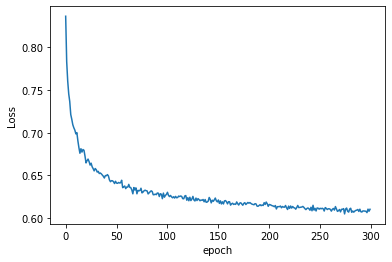

In [0]:
import matplotlib.pyplot as plt
plt.plot(range(epochs), aggregated_losses)
plt.ylabel('Loss')
plt.xlabel('epoch');

In [0]:
#making predictions
with torch.no_grad():
    y_val = model(categorical_test_data, numerical_test_data)
    loss = loss_function(y_val, test_outputs)
print(f'Loss: {loss:.8f}')

Loss: 0.67696178


In [0]:
print(y_val[:5])

tensor([[ 0.5680,  0.1210],
        [-0.4813, -0.0101],
        [-0.5933, -2.2076],
        [ 0.0345, -0.9098],
        [-0.2113,  1.7244]])


In [0]:
y_val = np.argmax(y_val, axis=1)

In [0]:
print(y_val[:5])

tensor([0, 1, 0, 0, 1])


In [0]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(test_outputs,y_val))
print(classification_report(test_outputs,y_val))
print(accuracy_score(test_outputs, y_val))

[[972 497]
 [567 755]]
              precision    recall  f1-score   support

           0       0.63      0.66      0.65      1469
           1       0.60      0.57      0.59      1322

    accuracy                           0.62      2791
   macro avg       0.62      0.62      0.62      2791
weighted avg       0.62      0.62      0.62      2791

0.618774632748119


In [0]:
#Test accuracy = 61.877% on dropping bottom 4 features